# Policy Gradient
## Zein Alabedeen Barhoum

In this notebook, two implementation of policy gradient reinforcement learning where applied. 

1. Simple policy gradient
2. Reward-to-go policy gradient
   
The environment used for testing is `CartPole-v0` from `gym` library

# Task 1: Simple Policy Gradient

In [ ]:
import torch
import copy
from torch.autograd import Variable
import random
import math
import torchvision.transforms as T
import numpy as np
import time

from torch.distributions import Categorical

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class PG():
    ''' Deep Q Neural Network class. '''
    def __init__(self, state_dim, action_dim, hidden_dim=12, alpha=0.001):

            self.model = torch.nn.Sequential(
                torch.nn.Linear(state_dim, hidden_dim),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(hidden_dim, action_dim),
            )
            self.optimizer = torch.optim.Adam(self.model.parameters(), alpha)
            self.schedular = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size= 10, gamma= 0.9)

    def get_policy(self, state):
      logits = self.model(torch.as_tensor(state, dtype= torch.float32))
      return Categorical(logits= logits)

    def get_action(self, state):
      policy = self.get_policy(state)
      return policy.sample().item()

    def update(self, s, a, w):
        """Update the weights of the network given a training sample. """

        self.optimizer.zero_grad()

        s_t = torch.as_tensor(s, dtype= torch.float32)
        a_t = torch.as_tensor(a, dtype= torch.float32)
        w_t = torch.as_tensor(w, dtype= torch.float32)

        logp = self.get_policy(s_t).log_prob(a_t)
        loss = -(logp * w_t).mean()

        loss.backward()
        self.optimizer.step()

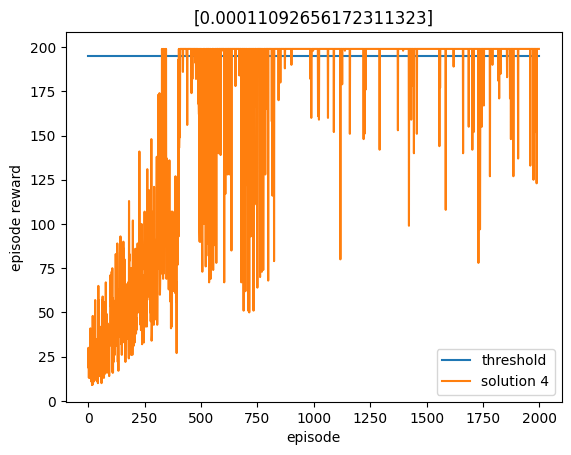

done


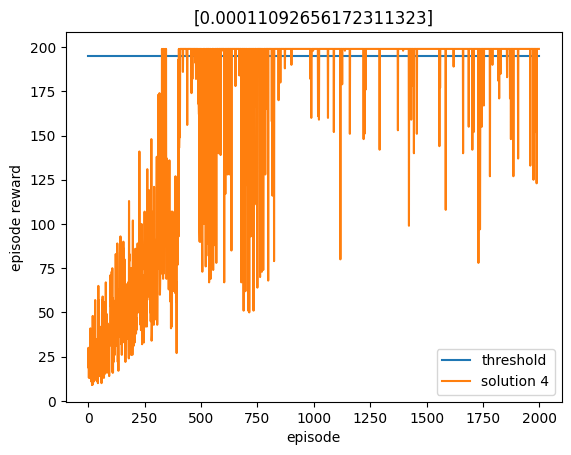

In [ ]:
import gym, math
import numpy as np

env = gym.make('CartPole-v0')

# Q table
n_states = 4
n_actions = env.action_space.n # Actions

# Learning Parameters
alpha = 0.05 # learning rate
gamma = 0.99 # reward discount factor

# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 2000
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_total_reward = np.zeros(EPISODES_MAX)
log_steps_number = np.zeros(EPISODES_MAX)

#
n_hidden = 16
model = PG(n_states, n_actions, n_hidden, alpha)

batch_states = []
batch_actions = []
batch_weights = []

episode_rewards = []


returns = []
lengths = []


batch_size = 400

epoch = 0

# PG
for i_episode in range(EPISODES_MAX):
    observation = env.reset()
    rewards = 0
    state = observation
    episode_rewards =[]

    if (i_episode + 1) % 50 == 0:
        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_steps_number[0:i_episode], label="solution 4")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title(f'{epoch} {model.schedular.get_lr()}')
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model.get_action(state)

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        batch_states.append(state)
        batch_actions.append(action)

        episode_rewards.append(reward)
        if done:

            total_return = sum(episode_rewards)
            episode_len = len(episode_rewards)

            batch_weights += [total_return] * episode_len

            returns.append(total_return)
            lengths.append(episode_len)

            log_steps_number[i_episode] = t + 1
            break

        # Update current state
        state = next_state

        # Update Policy
    if(len(batch_states) > batch_size):
        epoch += 1
        # print(len(batch_states))
        # print(len(batch_actions))
        # print(len(batch_weights))

        model.update(batch_states,batch_actions,batch_weights)
        batch_states = []
        batch_actions = []
        batch_weights = []
        episode_rewards = []

        model.schedular.step()


print("done")

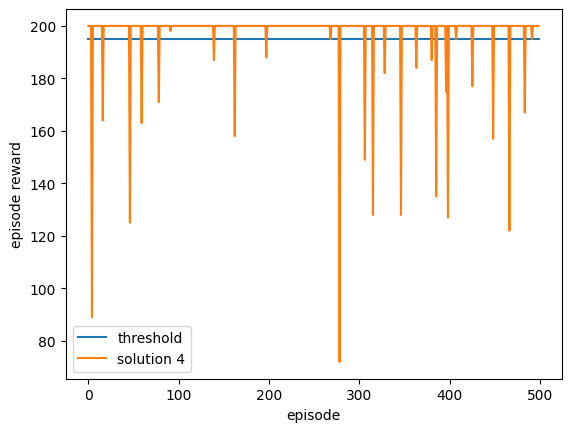

done


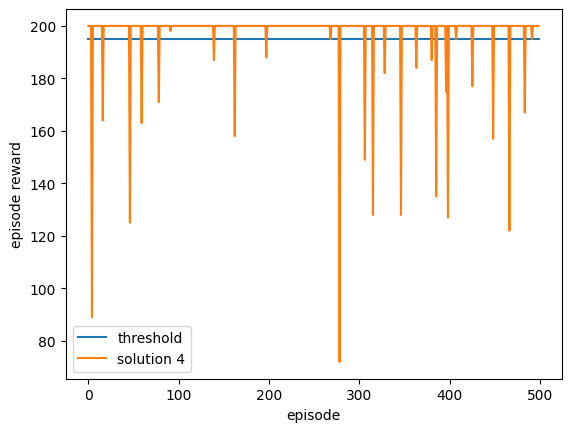

In [ ]:
for i_episode in range(500):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 50 == 0:
        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_steps_number[0:i_episode], label="solution 4")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model.get_action(state)

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        if done:
            log_steps_number[i_episode] = t + 1

            break

        # Update current state
        state = next_state
print("done")

# Task 2: Reward-to-go policy gradient

In [ ]:
def reward_to_go(rews):
    n = len(rews)
    rtgs = np.zeros_like(rews)
    for i in reversed(range(n)):
        rtgs[i] = rews[i] + (rtgs[i+1] if i+1 < n else 0)
    return rtgs

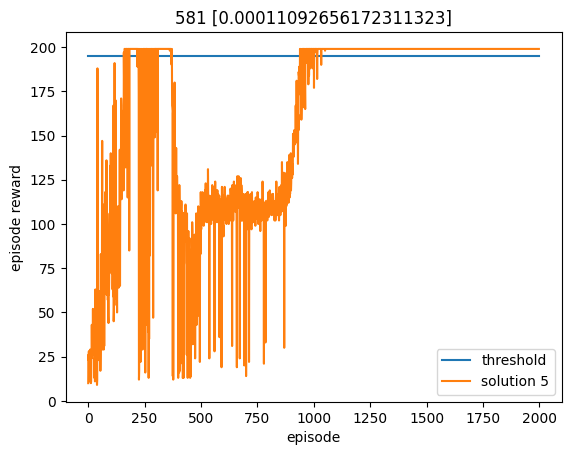

done


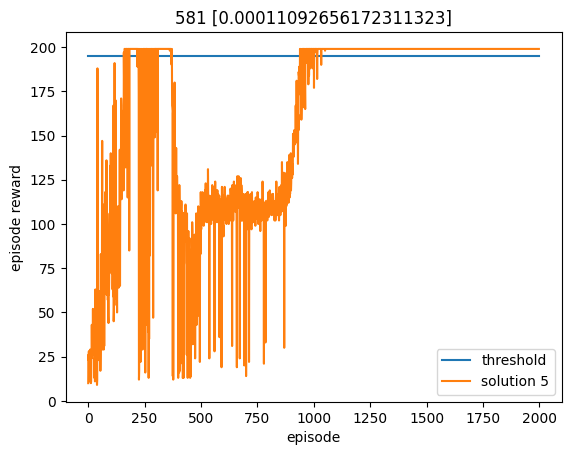

In [ ]:
env = gym.make('CartPole-v0')

# Q table
n_states = 4
n_actions = env.action_space.n # Actions

# Learning Parameters
alpha = 0.05 # learning rate
gamma = 0.99 # reward discount factor

# Execution parameters
SHOW_ANIMATION = False
EPISODES_MAX = 2000
STEPS_MAX = 200
DESIRED_STEPS = 200

# Loggers
log_total_reward = np.zeros(EPISODES_MAX)
log_steps_number = np.zeros(EPISODES_MAX)

#
n_hidden = 16
model = PG(n_states, n_actions, n_hidden, alpha)

batch_states = []
batch_actions = []
batch_weights = []

episode_rewards = []


returns = []
lengths = []


batch_size = 400

epoch = 0

# PG
for i_episode in range(EPISODES_MAX):
    observation = env.reset()
    rewards = 0
    state = observation
    episode_rewards =[]

    if (i_episode + 1) % 50 == 0:
        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_steps_number[0:i_episode], label="solution 5")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        plt.title(f'{epoch} {model.schedular.get_lr()}')
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model.get_action(state)

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        batch_states.append(state)
        batch_actions.append(action)

        episode_rewards.append(reward)
        if done:

            total_return = sum(episode_rewards)
            episode_len = len(episode_rewards)

            batch_weights += list(reward_to_go(episode_rewards))

            returns.append(total_return)
            lengths.append(episode_len)

            log_steps_number[i_episode] = t + 1
            break

        # Update current state
        state = next_state

        # Update Policy
    if(len(batch_states) > batch_size):
        epoch += 1
        # print(len(batch_states))
        # print(len(batch_actions))
        # print(len(batch_weights))

        model.update(batch_states,batch_actions,batch_weights)
        batch_states = []
        batch_actions = []
        batch_weights = []
        episode_rewards = []
        model.schedular.step()
print("done")

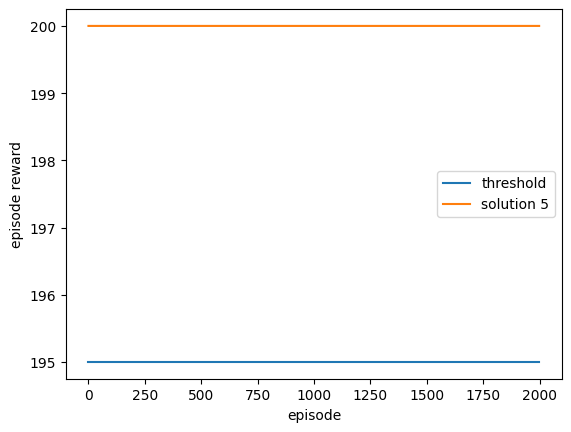

done


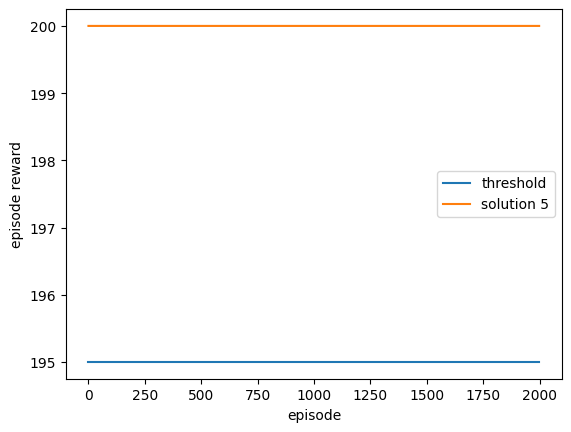

In [ ]:
for i_episode in range(EPISODES_MAX):
    observation = env.reset()
    rewards = 0
    state = observation

    if i_episode > 50 and (i_episode + 1) % 50 == 0:
        plt.figure(2)
        plt.clf()
        plt.plot([0,i_episode], [195, 195], label="threshold")
        plt.plot(range(0,i_episode), log_steps_number[0:i_episode], label="solution 5")
        plt.xlabel('episode')
        plt.ylabel('episode reward')
        plt.legend()
        display.clear_output(wait=True)
        display.display(plt.gcf())

    for t in range(STEPS_MAX):
        action = model.get_action(state)

        observation, reward, done, info = env.step(action)

        rewards += reward
        next_state = observation

        if done:
            log_steps_number[i_episode] = t + 1

            break

        # Update current state
        state = next_state
print("done")